This code plots seasonal changes in the isoprene signal (variance and mean), as well as compares the outputs from the three different models made in this project (SARIMA, RF, and NN).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import matplotlib.dates as mdates

In [3]:
def bair_data_read_in(site_dir:str):
    df_lst = []
    for file in os.listdir(site_dir):
        try:
            df = pd.read_csv(rf'{site_dir}/{file}', header=1)
            df['time'] = pd.to_datetime(df['time'], unit='s')
            df['time'] = df['time'].dt.round('min')
            df_lst.append(df)
        except:
            pass
    data = pd.concat(df_lst)
    data = data.sort_values('time')
    try:
        data = data.rename(columns={'wsp_avg_ms': 'wsp', 'wdr_avg': 'wdr'})
    except AttributeError:
        pass
    if 'met' in site_dir:
        data = data[['time', 'wsp', 'wdr', 'temp_f']]
    else:
        data = data[['time', 'isoprene']]
    return data

isoprene = bair_data_read_in(r'/Users/gabegreenberg/Boulder_AIR/BoulderAIR_data/LUR/voc')
print(isoprene)
iso_24 = isoprene[isoprene['time'].dt.year == 2024]
print(iso_24)

                    time  isoprene
0    2020-02-01 00:42:00   0.01731
1    2020-02-01 02:06:00   0.01313
2    2020-02-01 03:31:00   0.01731
3    2020-02-01 04:55:00   0.01851
4    2020-02-01 06:20:00   0.01373
...                  ...       ...
1023 2025-02-19 00:05:00   0.00504
1024 2025-02-19 01:05:00   0.00504
1025 2025-02-19 02:05:00   0.00504
1026 2025-02-19 03:05:00   0.00504
1027 2025-02-19 04:05:00   0.00504

[40055 rows x 2 columns]
                    time  isoprene
0    2024-01-01 00:05:00  0.005157
1    2024-01-01 01:05:00  0.005157
2    2024-01-01 02:05:00  0.013180
3    2024-01-01 03:05:00  0.017840
4    2024-01-01 04:05:00  0.049260
...                  ...       ...
2057 2024-12-31 16:05:00  0.005008
2058 2024-12-31 17:05:00  0.005008
2059 2024-12-31 18:05:00  0.005008
2060 2024-12-31 22:05:00  0.005008
2061 2024-12-31 23:05:00  0.005008

[8340 rows x 2 columns]


In [4]:
# gathering the monthley isoprene statistics for plotting
iso_24['month'] = iso_24['time'].dt.month
iso_24_agg = iso_24.groupby('month').agg(['mean', 'std']).reset_index()
print(iso_24_agg)

   month                          time                            isoprene  \
                                  mean                       std      mean   
0      1 2024-01-16 12:09:06.713286656 8 days 22:59:14.241078906  0.017262   
1      2 2024-02-15 15:12:32.017937408 8 days 08:01:30.525859509  0.010264   
2      3 2024-03-16 13:23:00.000000000 8 days 22:48:46.989060960  0.007151   
3      4 2024-04-16 00:10:58.418740736 8 days 15:06:01.422362290  0.006287   
4      5 2024-05-16 11:01:52.394366464 8 days 21:40:22.064087956  0.010480   
5      6 2024-06-16 00:08:22.890173184 8 days 15:40:58.711148190  0.103957   
6      7 2024-07-16 14:44:12.875175424 8 days 23:11:02.586658926  0.159681   
7      8 2024-08-16 10:21:51.235955200 8 days 22:58:24.295763278  0.121951   
8      9 2024-09-15 17:53:36.320474624 8 days 17:04:11.838985644  0.095338   
9     10 2024-10-16 10:26:13.231622656 8 days 22:08:53.119427497  0.020342   
10    11 2024-11-15 21:56:28.023952128 8 days 15:03:01.067755984

/var/folders/2c/kht9wb5n56xdj4mxjj2k7twr0000gn/T/ipykernel_79566/1454131744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iso_24['month'] = iso_24['time'].dt.month


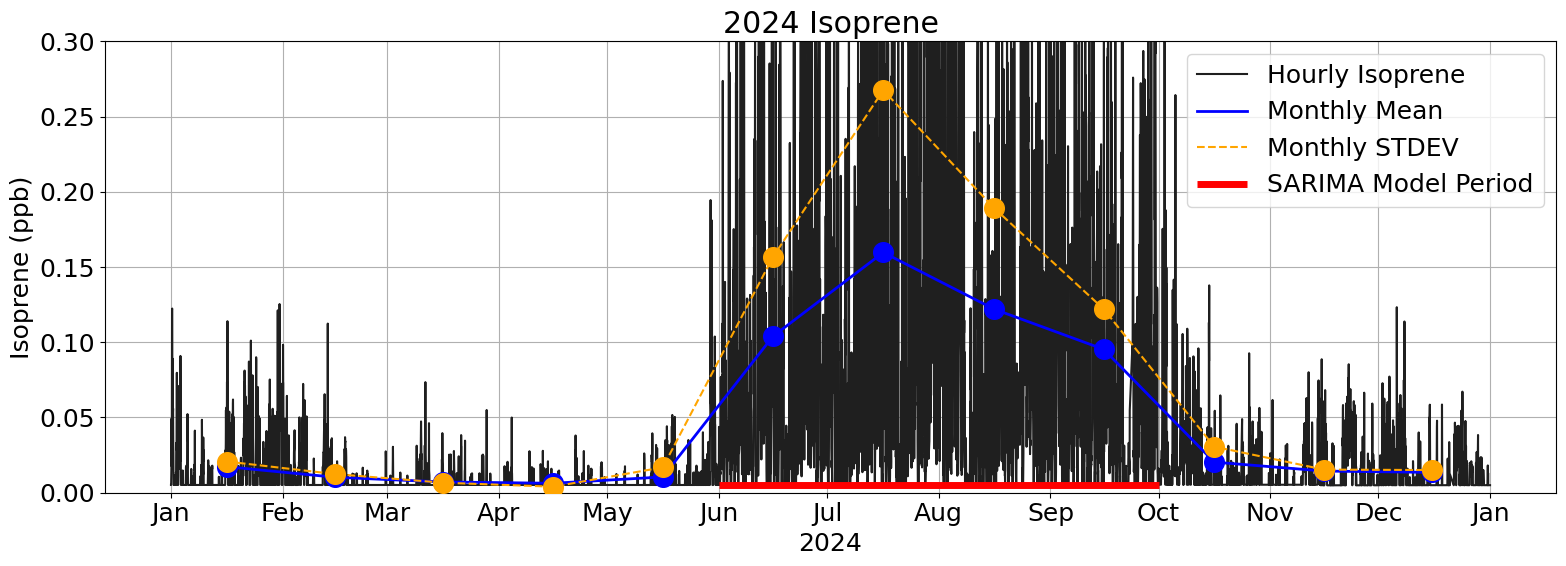

In [5]:

plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 18})

plt.plot(iso_24['time'], iso_24['isoprene'], color='#1f1f1f', label='Hourly Isoprene')
plt.plot(iso_24_agg[('time', 'mean')], iso_24_agg[('isoprene', 'mean')], 
         color='blue', linewidth=2, label='Monthly Mean')
plt.scatter(iso_24_agg[('time', 'mean')], iso_24_agg[('isoprene', 'mean')], 
            color='blue', s=200, zorder=3)
plt.plot(iso_24_agg[('time', 'mean')], iso_24_agg[('isoprene', 'std')], 
         color='orange', linestyle='--', label='Monthly STDEV', alpha=1)
plt.scatter(iso_24_agg[('time', 'mean')], iso_24_agg[('isoprene', 'std')], 
            color='orange', s=200, zorder=3, alpha=1)
start_d = datetime.datetime(2024, 6, 1)
end_d = datetime.datetime(2024, 10, 1)
plt.hlines(y=.005, xmin=start_d, xmax=end_d, colors='red', linewidth=5, label='SARIMA Model Period')

plt.title('2024 Isoprene')
plt.xlabel('2024')
plt.ylabel('Isoprene (ppb)')
plt.grid()
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.ylim(0, .3)
plt.tight_layout()
plt.show()



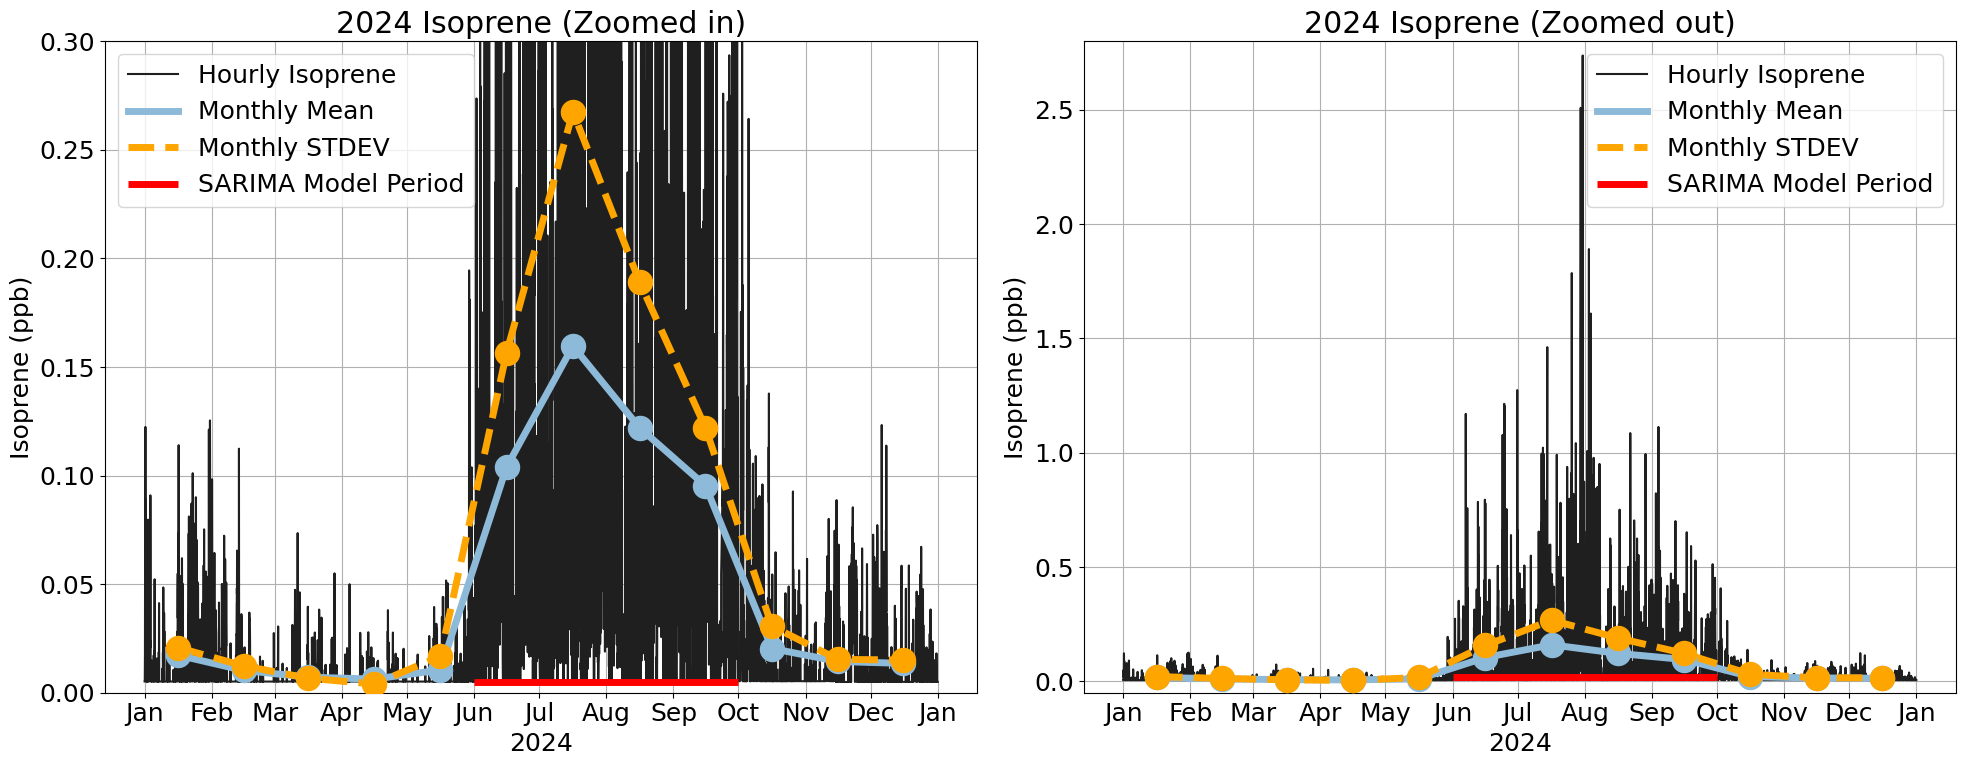

In [6]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8)) 
plt.rcParams.update({'font.size': 18})

ax1.plot(iso_24['time'], iso_24['isoprene'], color='#1f1f1f', label='Hourly Isoprene')
ax1.plot(iso_24_agg[('time', 'mean')], iso_24_agg[('isoprene', 'mean')], 
         color='#8ebad9', linewidth=5, label='Monthly Mean')
ax1.scatter(iso_24_agg[('time', 'mean')], iso_24_agg[('isoprene', 'mean')], 
            color='#8ebad9', s=300, zorder=3)
ax1.plot(iso_24_agg[('time', 'mean')], iso_24_agg[('isoprene', 'std')], 
         color='orange', linestyle='--', linewidth=5, label='Monthly STDEV', alpha=1)
ax1.scatter(iso_24_agg[('time', 'mean')], iso_24_agg[('isoprene', 'std')], 
            color='orange', s=300, zorder=3, alpha=1)
start_d = datetime.datetime(2024, 6, 1)
end_d = datetime.datetime(2024, 10, 1)

ax1.hlines(y=0.005, xmin=start_d, xmax=end_d, colors='red', linewidth=5, label='SARIMA Model Period')
ax1.set_title('2024 Isoprene (Zoomed in)')
ax1.set_xlabel('2024')
ax1.set_ylabel('Isoprene (ppb)')
ax1.grid()
ax1.legend()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.set_ylim(0, 0.3)

ax2.plot(iso_24['time'], iso_24['isoprene'], color='#1f1f1f', label='Hourly Isoprene')
ax2.plot(iso_24_agg[('time', 'mean')], iso_24_agg[('isoprene', 'mean')], 
         color='#8ebad9', linewidth=5, label='Monthly Mean')
ax2.scatter(iso_24_agg[('time', 'mean')], iso_24_agg[('isoprene', 'mean')], 
            color='#8ebad9', s=300, zorder=3)
ax2.plot(iso_24_agg[('time', 'mean')], iso_24_agg[('isoprene', 'std')], 
         color='orange', linestyle='--',linewidth=5, label='Monthly STDEV', alpha=1)
ax2.scatter(iso_24_agg[('time', 'mean')], iso_24_agg[('isoprene', 'std')], 
            color='orange', s=300, zorder=3, alpha=1)

ax2.hlines(y=0.02, xmin=start_d, xmax=end_d, colors='red', linewidth=5, label='SARIMA Model Period')
ax2.set_title('2024 Isoprene (Zoomed out)')
ax2.set_xlabel('2024')
ax2.set_ylabel('Isoprene (ppb)')
ax2.grid()
ax2.legend()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.set_ylim(-.05, 2.8) 

plt.tight_layout()
plt.show()


Comparison of model outputs next: 

In [7]:
#read in model output data for each of the three models
dir = '/Users/gabegreenberg/Documents/UW/ds_785_capstone/data_out'
SARIMA = pd.read_csv(f'{dir}/SARIMA_out.csv')
SARIMA['time'] = pd.to_datetime(SARIMA['time'])
SARIMA.name = 'SARIMA'

# the commented out sections were ran to compair the models just for the time window that the SARIMA model was run on
NN = pd.read_csv(f'{dir}/NN_out.csv')
NN['time'] = pd.to_datetime(NN['time'])
NN = NN[(NN['time'] >= "2024-06-01") & (NN['time'] <= "2024-10-01")]
NN.name = 'NN'

RF = pd.read_csv(f'{dir}/RF_out.csv')
RF['time'] = pd.to_datetime(RF['time'])
RF = RF[(RF['time'] >= "2024-06-01") & (RF['time'] <= "2024-10-01")]
RF.name = 'RF'

print(SARIMA)
print(NN)
print(RF)

                    time  isoprene      pred
0    2024-06-08 00:00:00  0.408000  0.380913
1    2024-06-08 01:00:00  0.124200  0.469377
2    2024-06-08 02:00:00  0.012320  0.959202
3    2024-06-08 03:00:00  0.005243  0.467011
4    2024-06-08 04:00:00  0.019410  0.222878
...                  ...       ...       ...
2756 2024-09-30 20:00:00  0.005369  0.155929
2757 2024-09-30 21:00:00  0.005369  0.150620
2758 2024-09-30 22:00:00  0.005369  0.185291
2759 2024-09-30 23:00:00  0.005369  0.225844
2760 2024-10-01 00:00:00  0.011270  0.204836

[2761 rows x 3 columns]
                    time  isoprene      pred
3437 2024-06-01 00:00:00  0.005243  0.052734
3438 2024-06-01 01:00:00  0.043750  0.067350
3439 2024-06-01 02:00:00  0.026310  0.052470
3440 2024-06-01 05:00:00  0.005243  0.045590
3441 2024-06-01 06:00:00  0.005243  0.044770
...                  ...       ...       ...
6180 2024-09-30 20:00:00  0.005369  0.097845
6181 2024-09-30 21:00:00  0.005369  0.127674
6182 2024-09-30 22:00:00  0.00

In [8]:
#calculating mean bias two different meterics were calculated because the (Hu et al.) paper doesn't explicitly say which bias calculation was used in their paper
model_df_lst = [SARIMA, NN, RF]
for model_df in model_df_lst:
    MB = np.sum(model_df['pred'] - model_df['isoprene'])/len(model_df)
    MBF = np.mean(model_df['pred'])/np.mean(model_df['isoprene'])
    r = model_df['pred'].corr(model_df['isoprene'])
    print(f'{model_df.name} Pearson R: {r}')
    print(f'{model_df.name} Mean Bias: {MB}')
    print(f'{model_df.name} Mean Bias Factor: {MBF}')

SARIMA Pearson R: 0.44356041056162415
SARIMA Mean Bias: 0.021171501807266985
SARIMA Mean Bias Factor: 1.1719479919247466
NN Pearson R: 0.4178384765672368
NN Mean Bias: 0.010350449912918506
NN Mean Bias Factor: 1.0866707777485527
RF Pearson R: 0.44257139284413
RF Mean Bias: 0.04238639787117904
RF Mean Bias Factor: 1.354927766460621


In [9]:
model_df_lst = [SARIMA, NN, RF]
for model_df in model_df_lst:
    model_df['resid'] = model_df['isoprene'] - model_df['pred']
    model_df['model'] = model_df.name

print(NN)

test = pd.concat(model_df_lst)
print(test)

                    time  isoprene      pred     resid model
3437 2024-06-01 00:00:00  0.005243  0.052734 -0.047491    NN
3438 2024-06-01 01:00:00  0.043750  0.067350 -0.023600    NN
3439 2024-06-01 02:00:00  0.026310  0.052470 -0.026160    NN
3440 2024-06-01 05:00:00  0.005243  0.045590 -0.040347    NN
3441 2024-06-01 06:00:00  0.005243  0.044770 -0.039527    NN
...                  ...       ...       ...       ...   ...
6180 2024-09-30 20:00:00  0.005369  0.097845 -0.092476    NN
6181 2024-09-30 21:00:00  0.005369  0.127674 -0.122305    NN
6182 2024-09-30 22:00:00  0.005369  0.256103 -0.250734    NN
6183 2024-09-30 23:00:00  0.005369  0.188581 -0.183212    NN
6184 2024-10-01 00:00:00  0.011270  0.236705 -0.225435    NN

[2748 rows x 5 columns]
                    time  isoprene      pred     resid   model
0    2024-06-08 00:00:00  0.408000  0.380913  0.027087  SARIMA
1    2024-06-08 01:00:00  0.124200  0.469377 -0.345177  SARIMA
2    2024-06-08 02:00:00  0.012320  0.959202 -0.946882

/var/folders/2c/kht9wb5n56xdj4mxjj2k7twr0000gn/T/ipykernel_79566/3140319651.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='model', y='resid', data=test, whis=[5, 95],
/var/folders/2c/kht9wb5n56xdj4mxjj2k7twr0000gn/T/ipykernel_79566/3140319651.py:11: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(ax=axes[0], x='model', y='resid', data=test, whis=[5, 95],
/var/folders/2c/kht9wb5n56xdj4mxjj2k7twr0000gn/T/ipykernel_79566/3140319651.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='model', y='resid', data=test, whis=[5, 95],
/var/folders/2c/kht9wb5n56xdj4mxjj2k7twr0000gn/T/ipykernel_79566/3140319

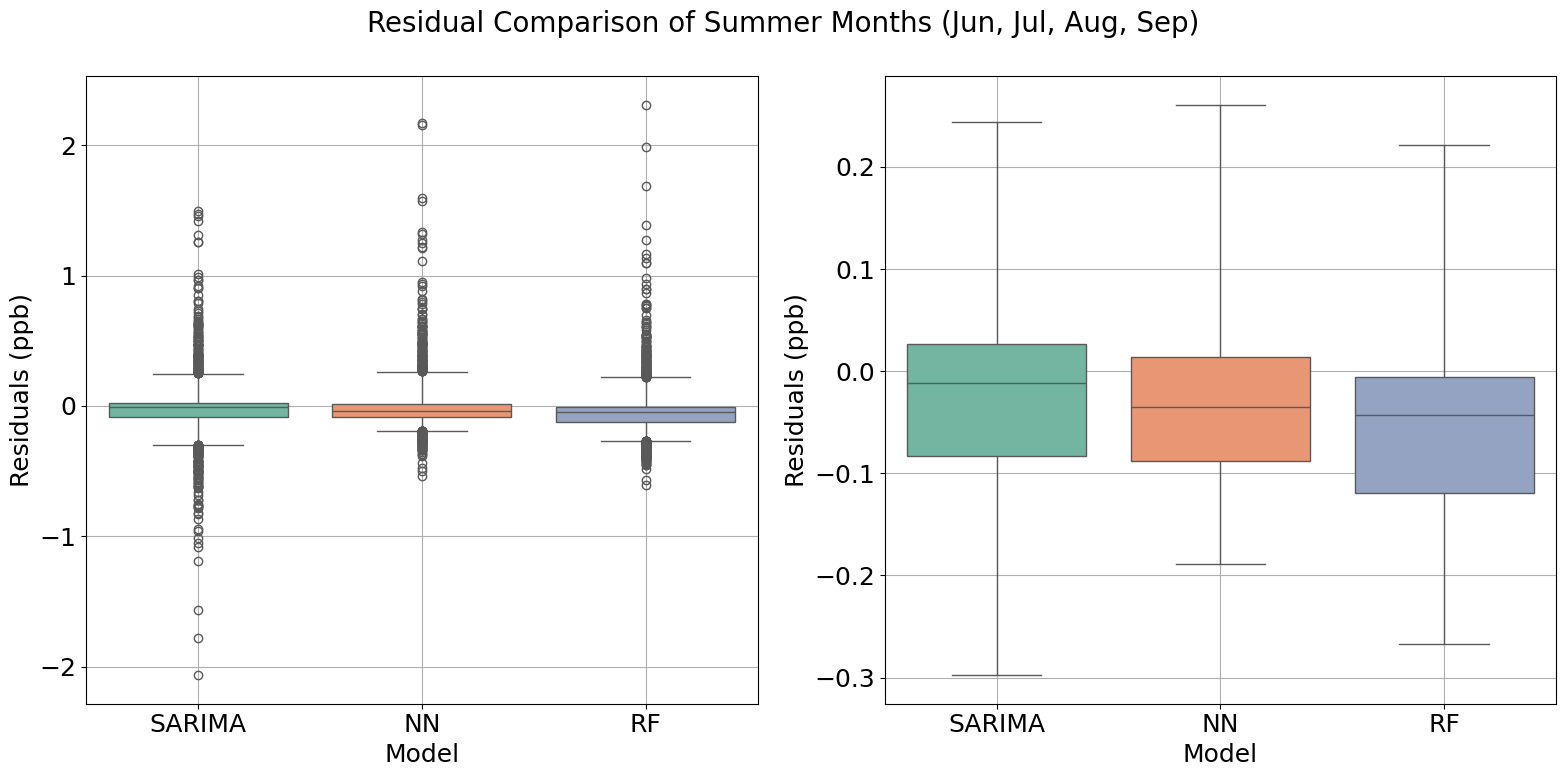

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Set2")

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Residual Comparison of Summer Months (Jun, Jul, Aug, Sep)', fontsize=20)
#fig.suptitle('Residual Comparison of Entire Test Year', fontsize=20)

#with fliers
sns.boxplot(ax=axes[0], x='model', y='resid', data=test, whis=[5, 95],
            palette=palette, showfliers=True)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Residuals (ppb)')
axes[0].grid()

#without fliers
sns.boxplot(ax=axes[1], x='model', y='resid', data=test, whis=[5, 95],
            palette=palette, showfliers=False)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Residuals (ppb)')
axes[1].grid()

plt.tight_layout()
plt.show()


In [11]:
# finaly I check the scales of each model RMSE relative to the mean
summer_2024_mean = 0.123
all_2024_mean = 0.0484

sarima_rmse = 0.201
nn_rmse = 0.1032
rf_rmse = 0.1067

print(f'SARIMA is {np.abs((1-(sarima_rmse/summer_2024_mean))*100):.2f}% larger than the observed sample mean.')
print(f'NN is {np.abs((1-(nn_rmse/all_2024_mean))*100):.2f}% larger than the observed sample mean.')
print(f'RF is {np.abs((1-(rf_rmse/all_2024_mean))*100):.2f}% larger than the observed sample mean.')

SARIMA is 63.41% larger than the observed sample mean.
NN is 113.22% larger than the observed sample mean.
RF is 120.45% larger than the observed sample mean.
